In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 658.7 kB/s eta 0:00:00


In [3]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('Customer_Churn_Prediction.csv')
df.head()
# load the dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df.shape

(4250, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

There are not missing values in any features.

In [7]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


# Univariate Analysis

In [9]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [10]:
# extract the categorical variables
cat_var = [ feature for feature in df.columns if df[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


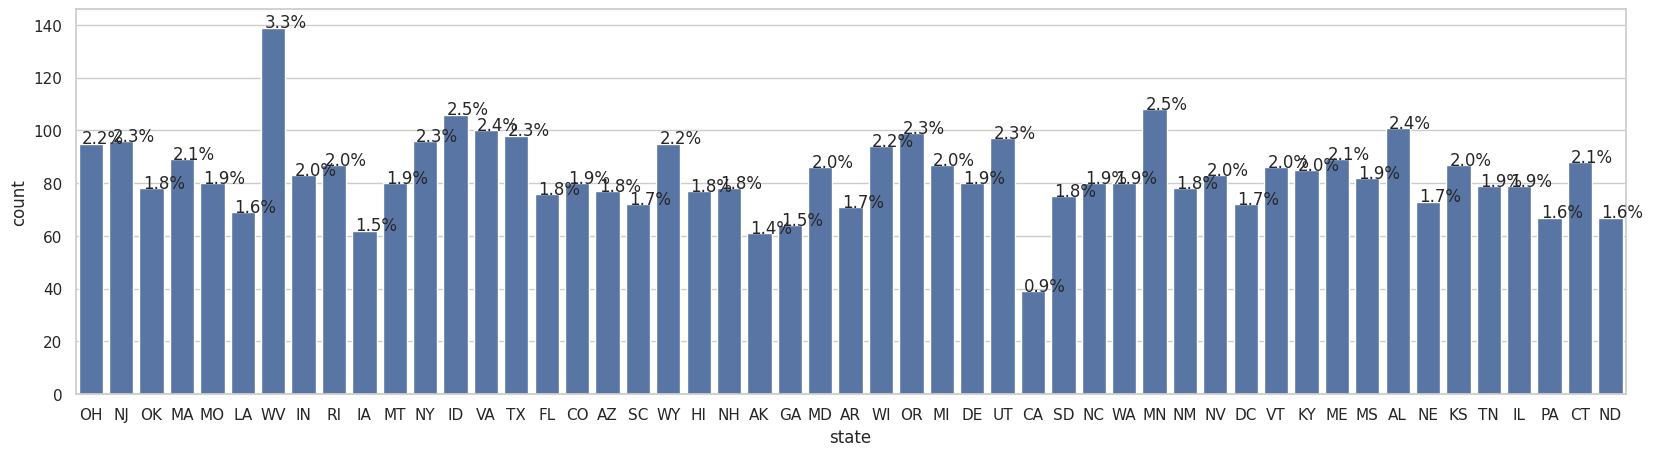

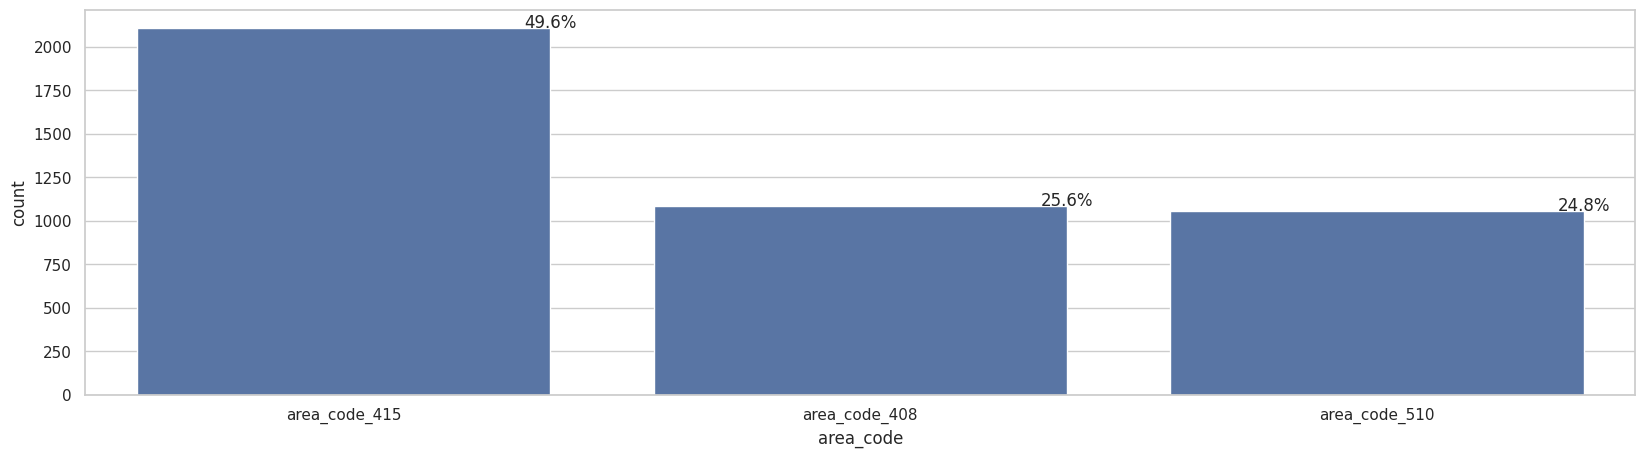

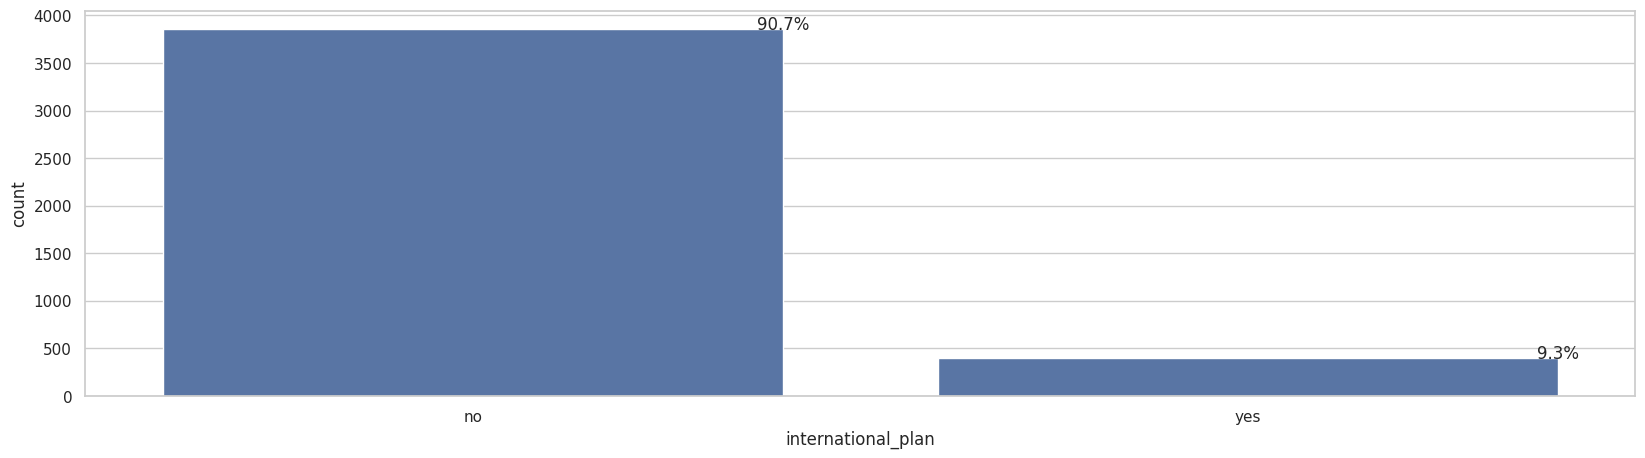

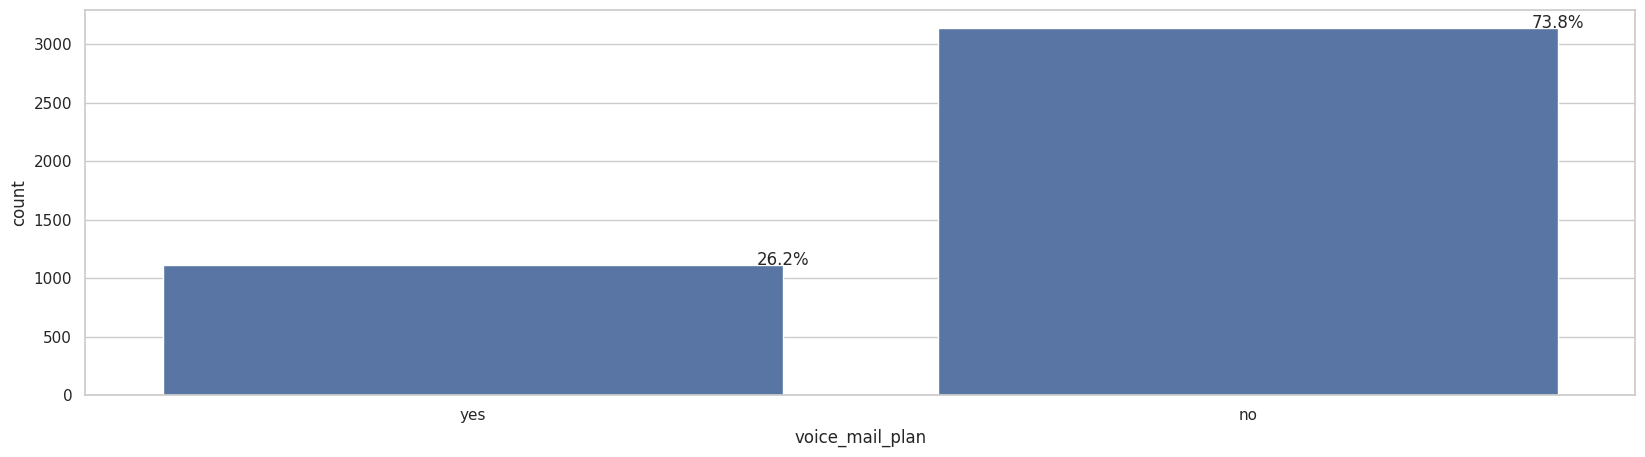

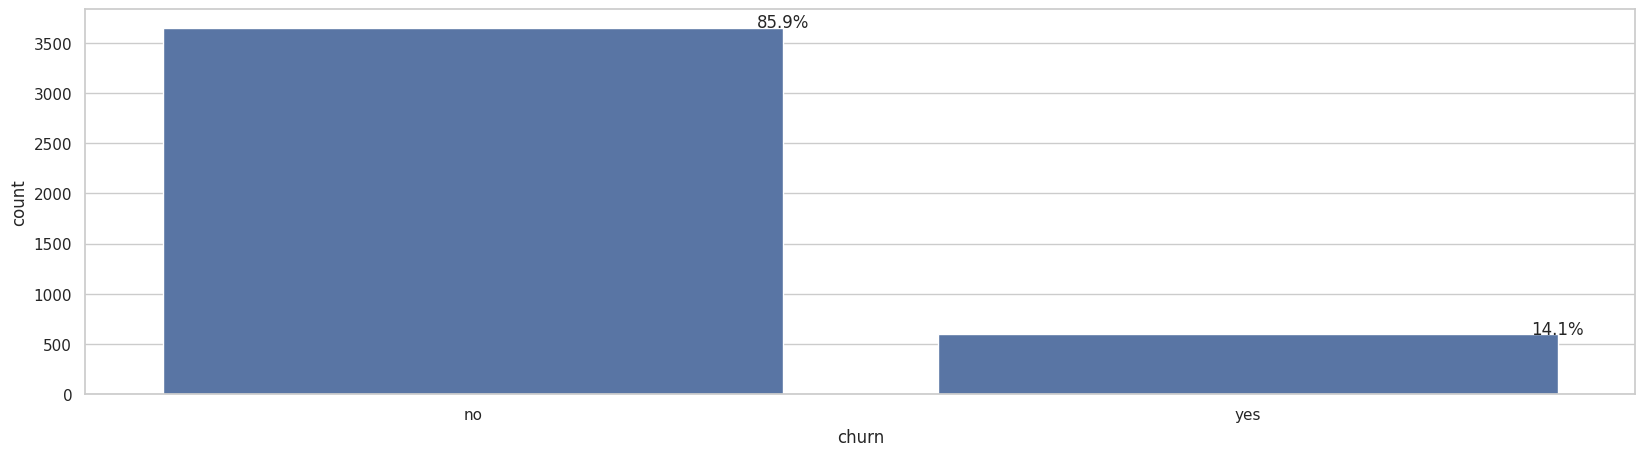

In [11]:
#display the all the categorical variable
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(df)
    ax = sns.countplot(x = df[feature], data =df)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

See the above plot

90.7% customers didn't have international plan

73.8% customers didn't have voice mail plan

49.6% customers are living in the area code area_code_415.

only 14.1% customers are churn

In [12]:
#Extract the numerical features from the dataset
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


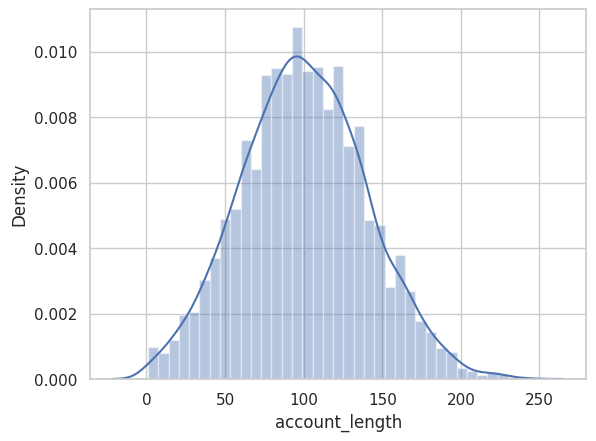

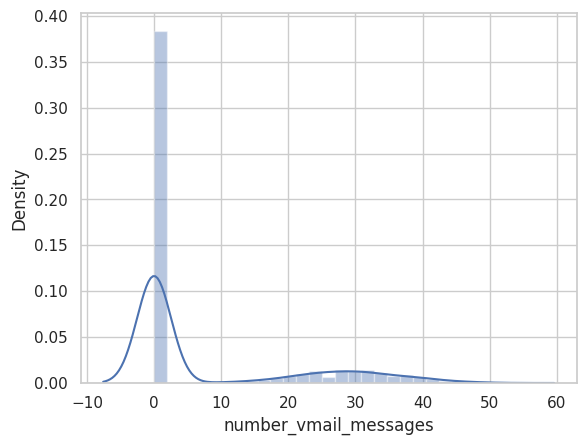

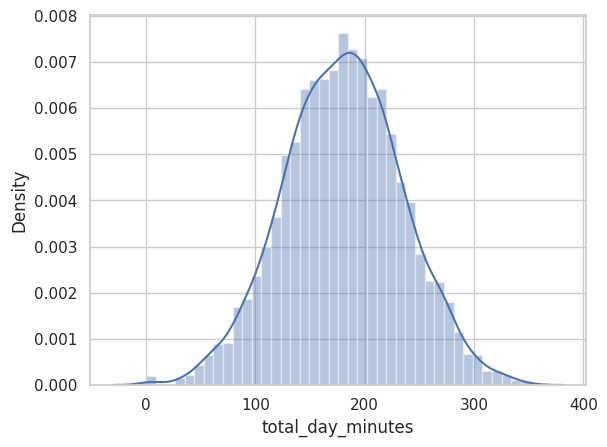

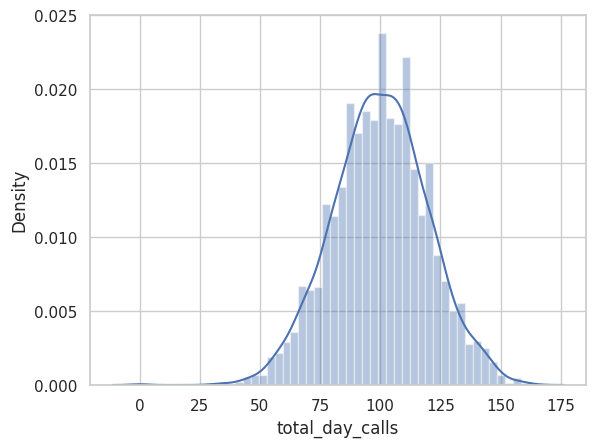

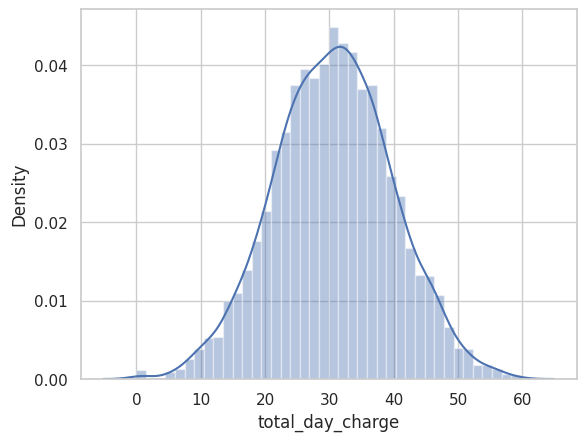

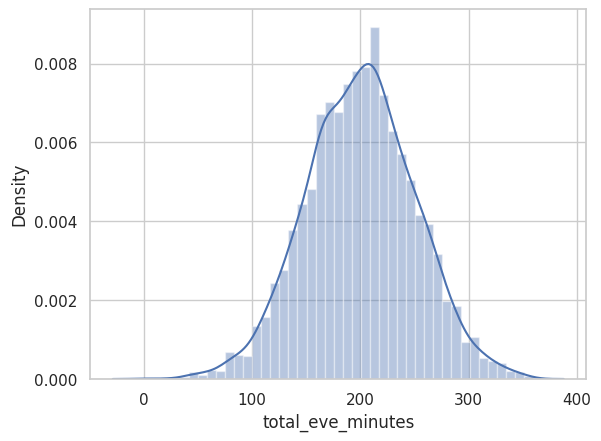

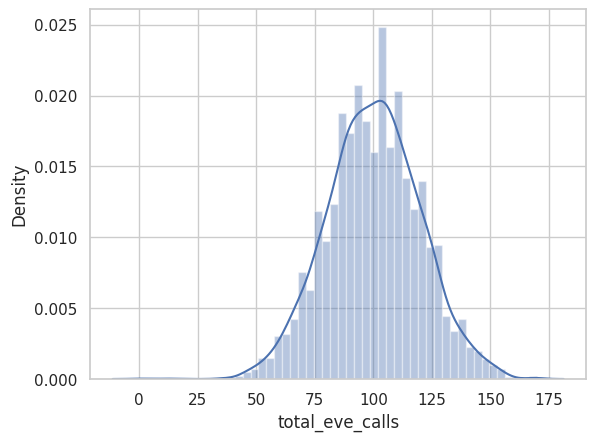

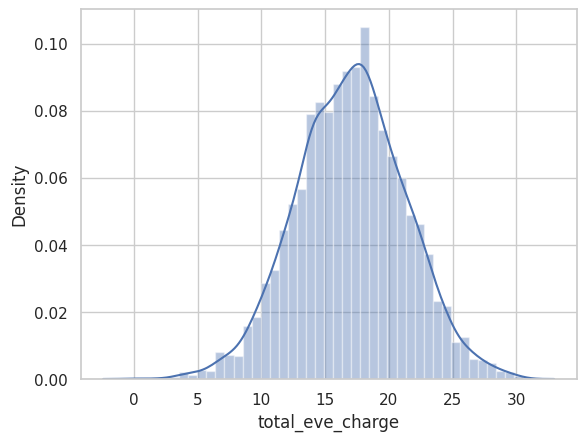

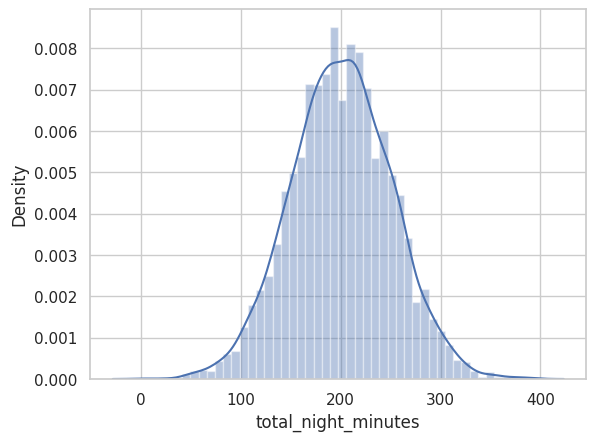

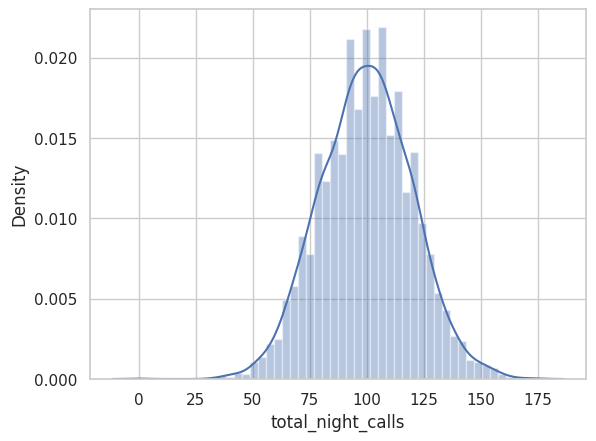

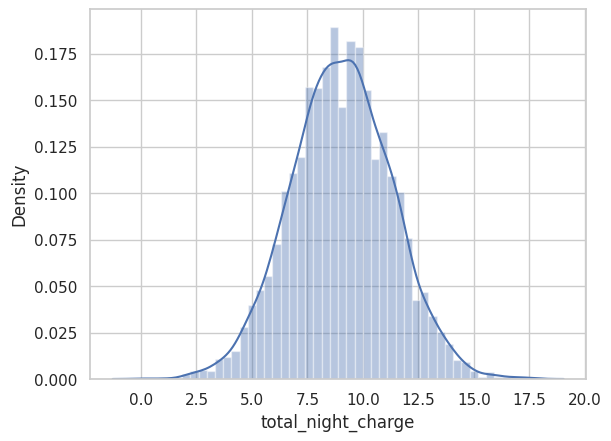

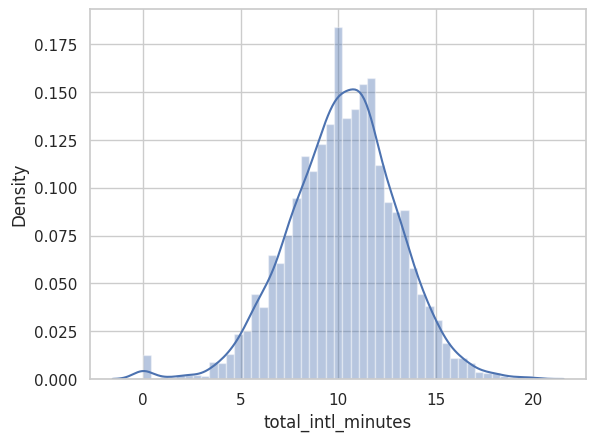

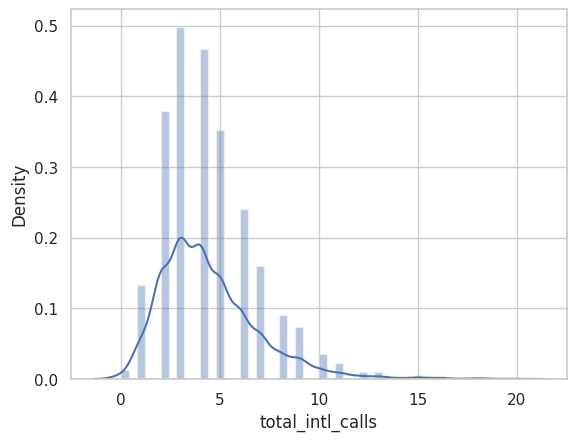

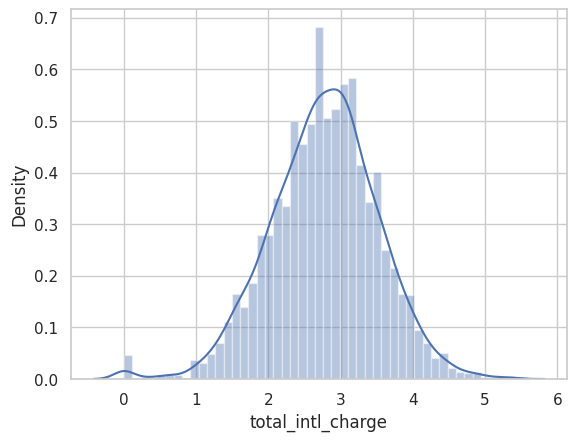

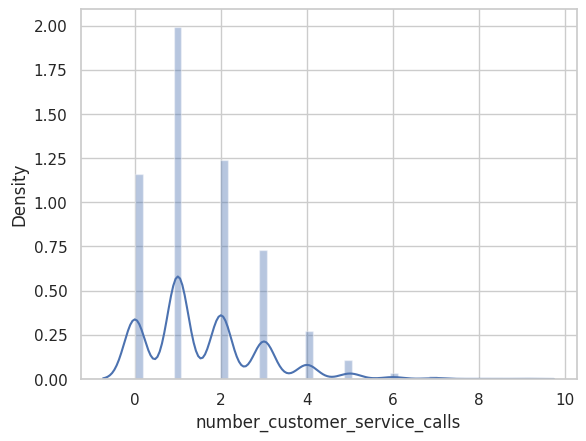

In [13]:
# Density plot of all the numerical features
for feature in num_var:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation so we can covert into normal distribution in featuer engineering step.

Other than the obove features all look like a normal distribution.

# BiVariate Analysis

In [14]:
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Text(0.5, 1.0, 'Churn rate VS account_length')

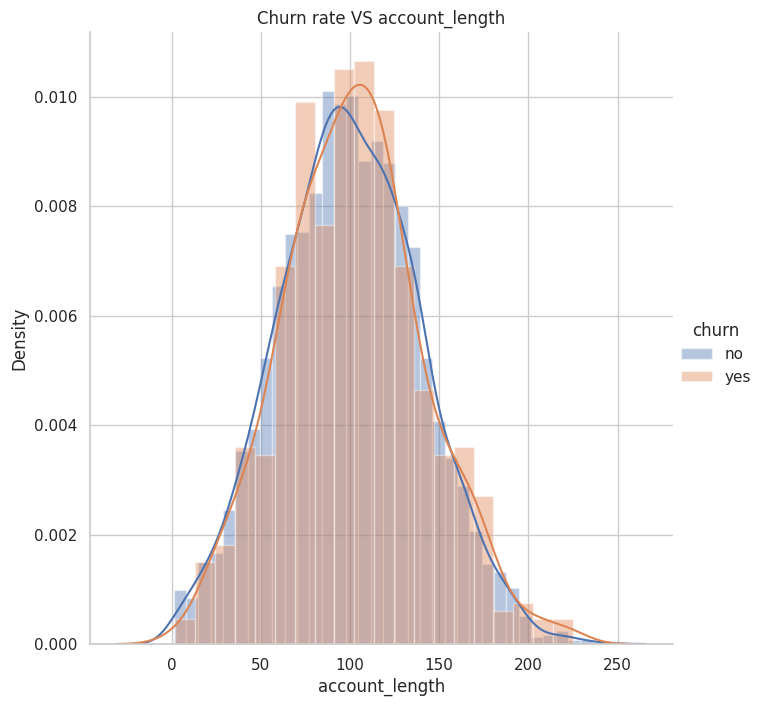

In [15]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'account_length').add_legend()
plt.title('Churn rate VS account_length')

customers account length between 60 to 120 has more churn rate

The churn rate follows a U-shaped distribution, with higher rates observed for customers with shorter account lengths (around 0-20 months) and for those with very long tenures (around 180 months and beyond).

Customers in the middle range of account lengths, approximately 20-180 months, tend to exhibit lower churn rates, with the minimum churn rate occurring around the 100-120 month mark.

Text(0.5, 1.0, 'Churn rate VS number_vmail_messages')

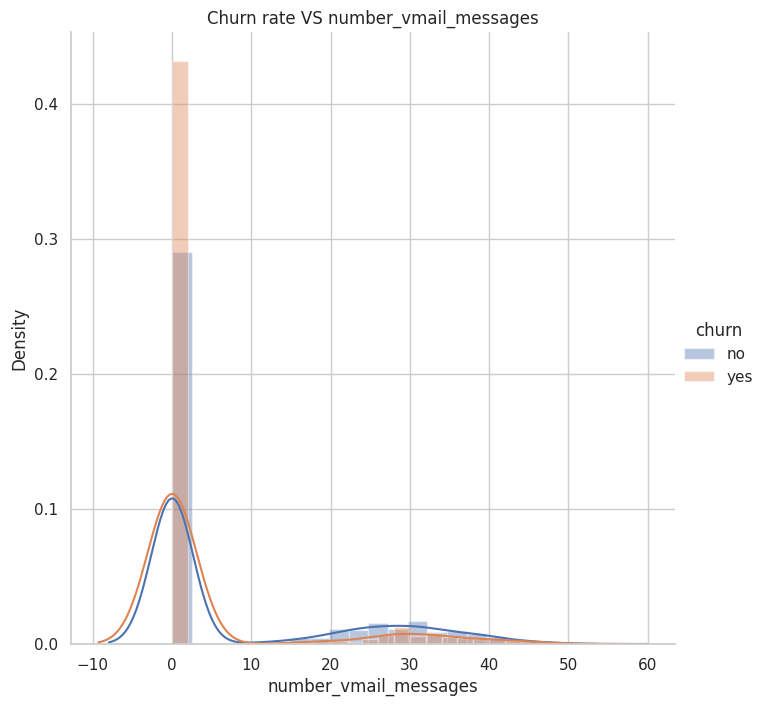

In [16]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'number_vmail_messages').add_legend()
plt.title('Churn rate VS number_vmail_messages')

More churn rate when the number_vamil_messages is 0

The majority of customers, both churners and non-churners, have a low number of voicemail messages (around 0-10).

There is a sharp peak in churn rate for customers with around 15-25 voicemail messages, indicating that customers with a higher number of voicemail messages are more likely to churn.

Text(0.5, 1.0, 'Churn rate VS total_day_minutes')

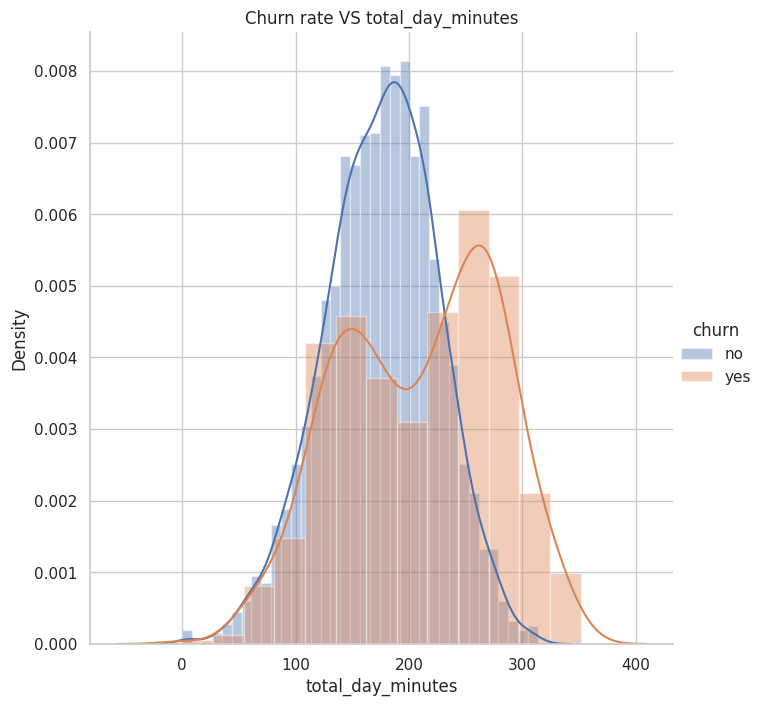

In [17]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_day_minutes').add_legend()
plt.title('Churn rate VS total_day_minutes')

Churn rate is high when the total_day_minutes is lies between 210 min to 300 min.

The churn rate exhibits a multi-modal distribution with respect to the total day minutes usage.

There are two peaks in churn rate: one for customers with very low total day minutes usage (around 0-50 minutes) and another for customers with relatively high total day minutes usage (around 250-300 minutes).

Customers with moderate total day minutes usage (around 100-200 minutes) tend to have lower churn rates.

Text(0.5, 1.0, 'Churn rate VS total_day_calls')

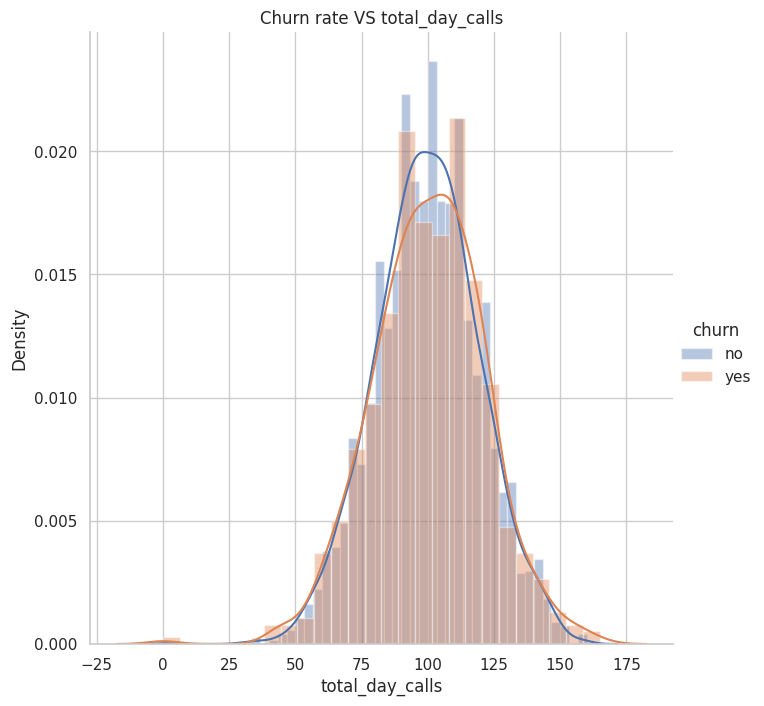

In [18]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_day_calls').add_legend()
plt.title('Churn rate VS total_day_calls')

churn rate is high lies between 85 to 115.

The churn rate distribution shows a similar pattern as the total day minutes, with two peaks at the extremes (very low and very high total day call counts) and a lower churn rate for moderate total day call counts.

Customers making an extremely high number of day calls (around 150 calls or more) exhibit a higher churn rate.

Text(0.5, 1.0, 'Churn rate VS total_day_charge')

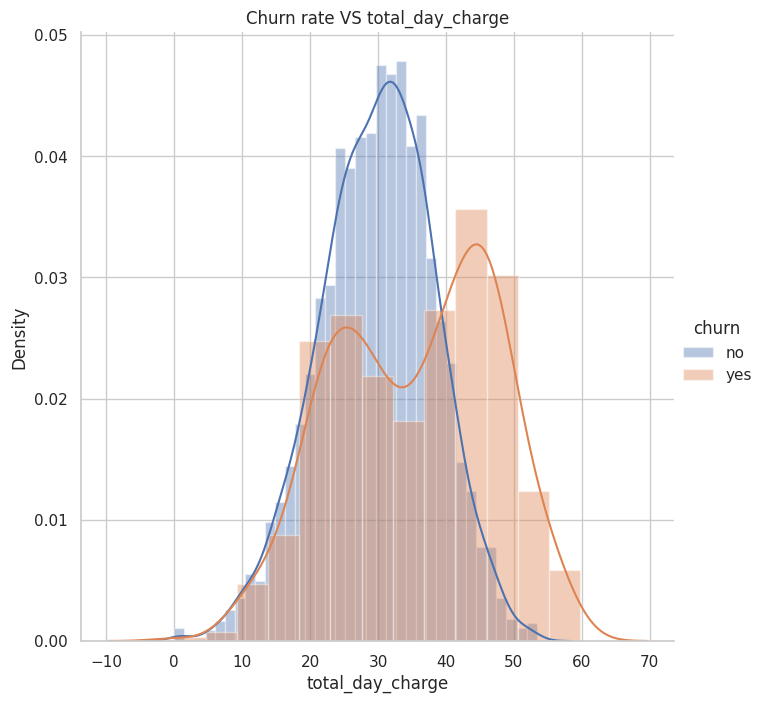

In [19]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_day_charge').add_legend()
plt.title('Churn rate VS total_day_charge')

churn rate is high when total day charge is lies between 40 to 50.

The churn rate distribution resembles a multi-modal curve with respect to the total day charge.

There is a peak in churn rate for customers with very low total day charges (around $0-$10), indicating that customers with minimal usage are more likely to churn.

Another peak in churn rate is observed for customers with relatively high total day charges (around $40-$50), suggesting that customers with high usage are also more prone to churn.

Customers with moderate total day charges (around $20-$30) tend to have lower churn rates.

Text(0.5, 1.0, 'Churn rate VS total_eve_minutes')

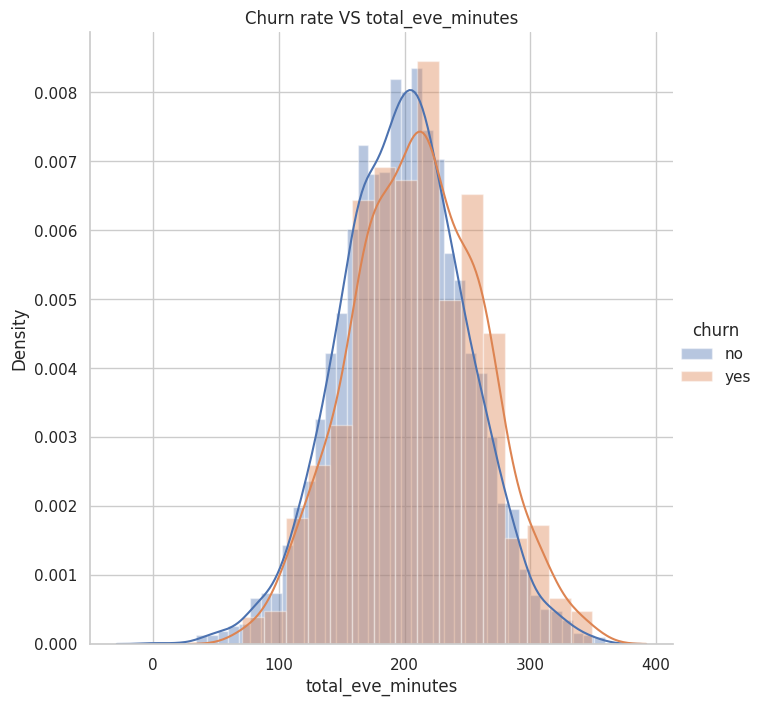

In [20]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_eve_minutes').add_legend()
plt.title('Churn rate VS total_eve_minutes')

Text(0.5, 1.0, 'Churn rate VS total_eve_calls')

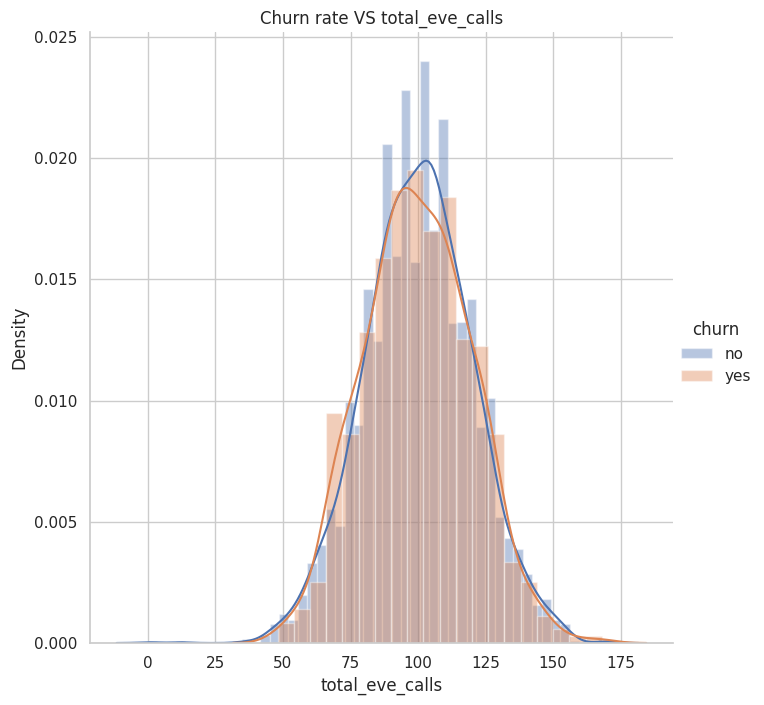

In [21]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_eve_calls').add_legend()
plt.title('Churn rate VS total_eve_calls')

Text(0.5, 1.0, 'Churn rate VS total_eve_charge')

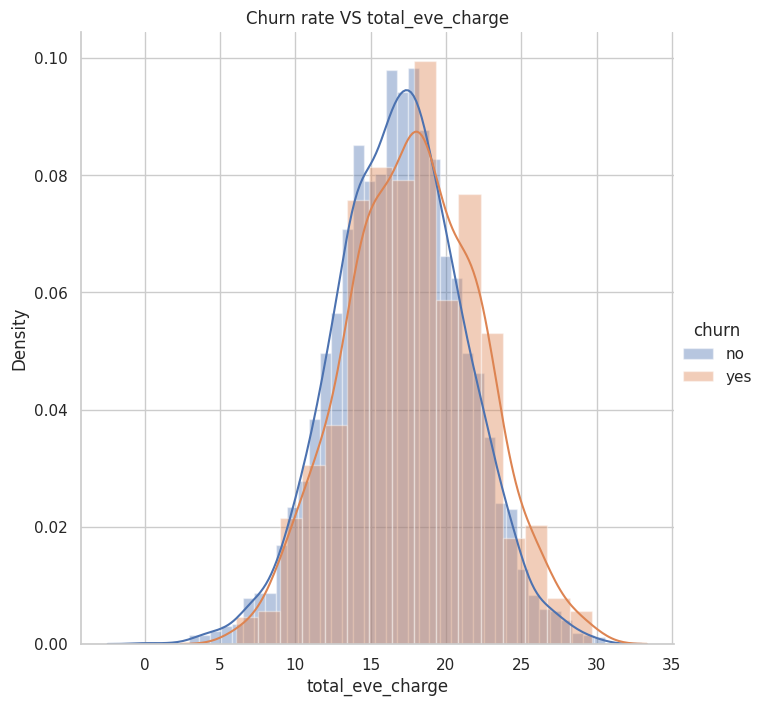

In [22]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_eve_charge').add_legend()
plt.title('Churn rate VS total_eve_charge')

Text(0.5, 1.0, 'Churn rate VS total_night_minutes')

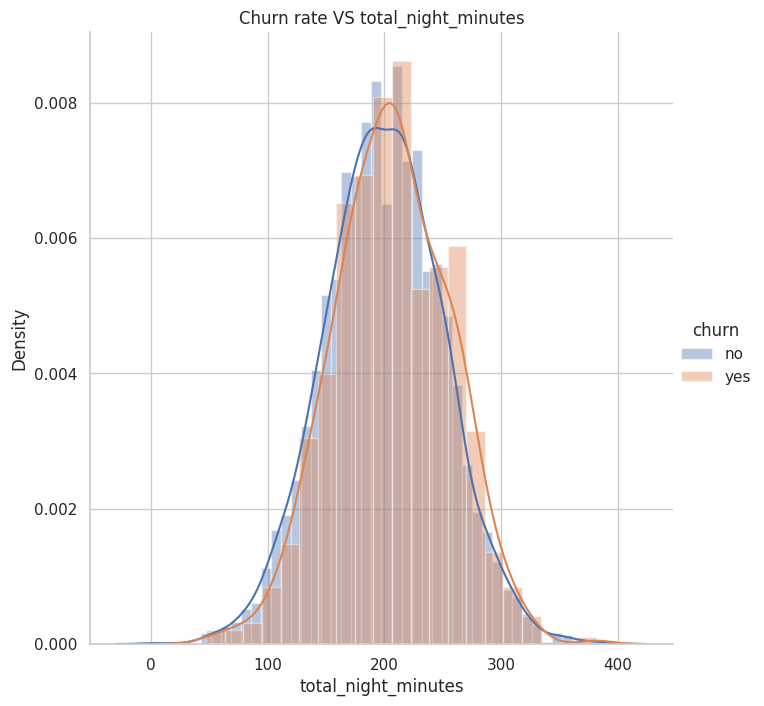

In [23]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_night_minutes').add_legend()
plt.title('Churn rate VS total_night_minutes')

Text(0.5, 1.0, 'Churn rate VS total_night_calls')

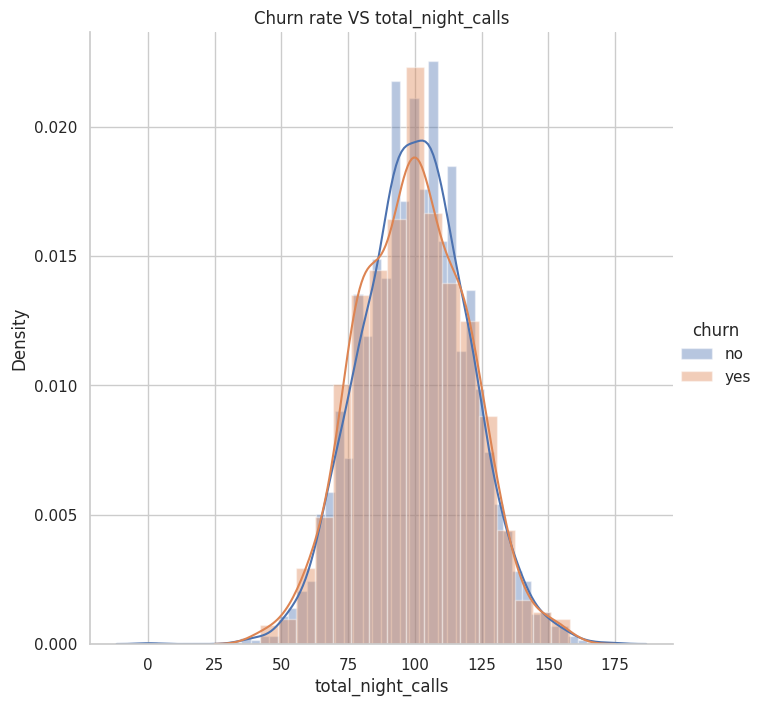

In [24]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_night_calls').add_legend()
plt.title('Churn rate VS total_night_calls')

Text(0.5, 1.0, 'Churn rate VS total_night_charge')

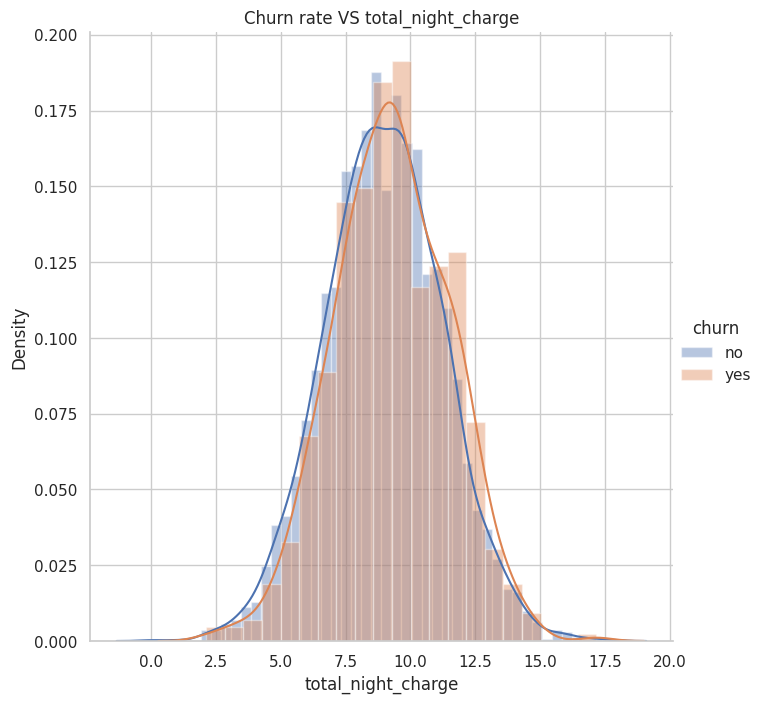

In [25]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_night_charge').add_legend()
plt.title('Churn rate VS total_night_charge')

Text(0.5, 1.0, 'Churn rate VS total_intl_minutes')

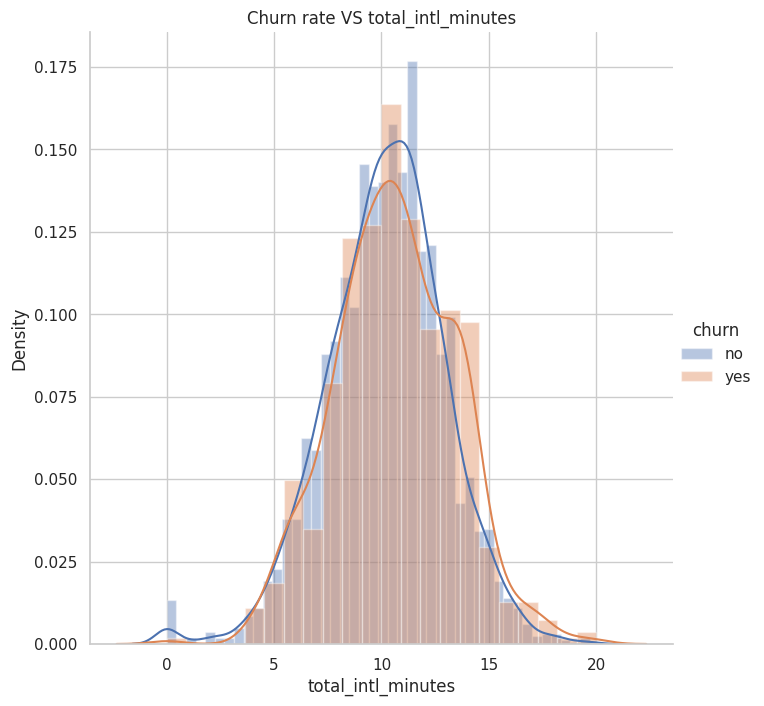

In [26]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_intl_minutes').add_legend()
plt.title('Churn rate VS total_intl_minutes')

Text(0.5, 1.0, 'Churn rate VS total_intl_calls')

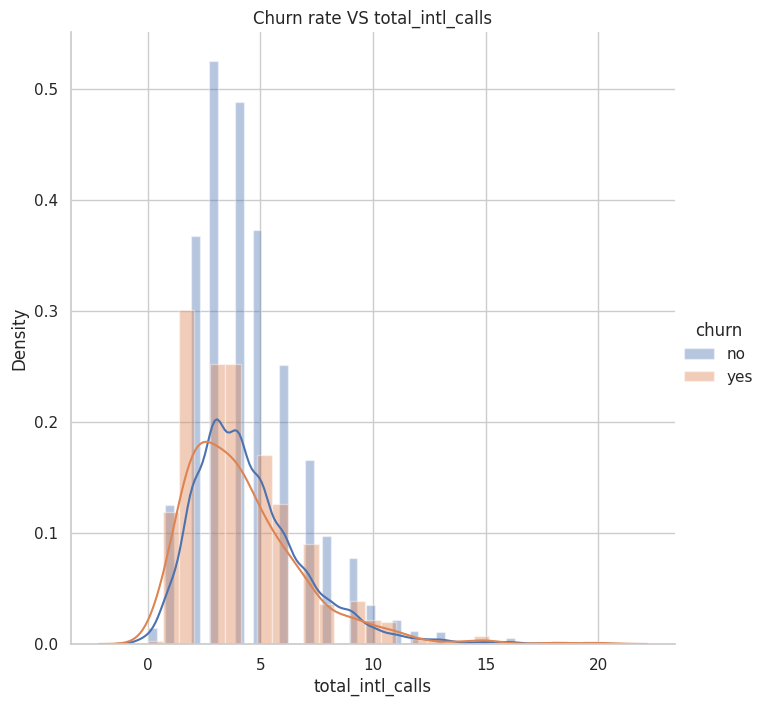

In [27]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_intl_calls').add_legend()
plt.title('Churn rate VS total_intl_calls')

Text(0.5, 1.0, 'Churn rate VS total_intl_charge')

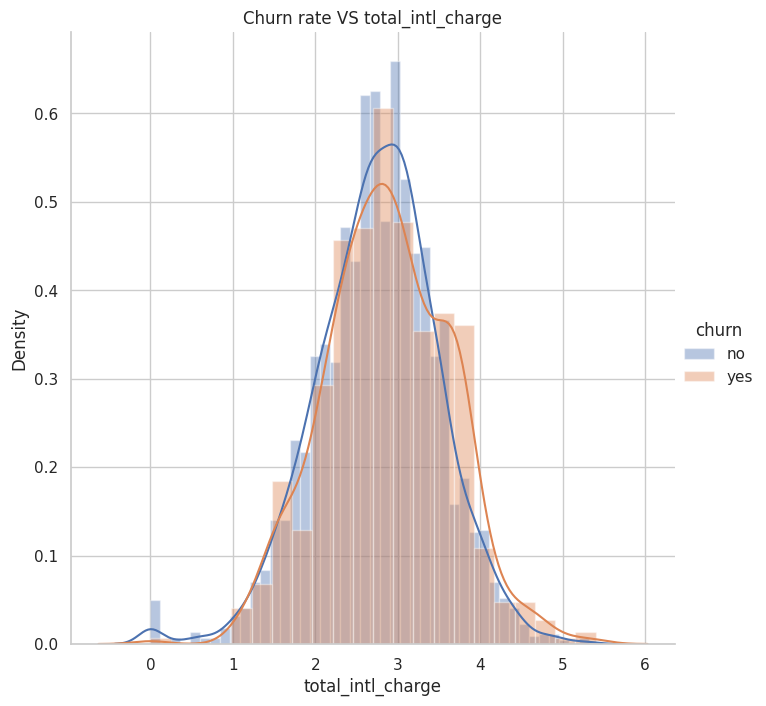

In [28]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'total_intl_charge').add_legend()
plt.title('Churn rate VS total_intl_charge')

Text(0.5, 1.0, 'Churn rate VS number_customer_service_calls')

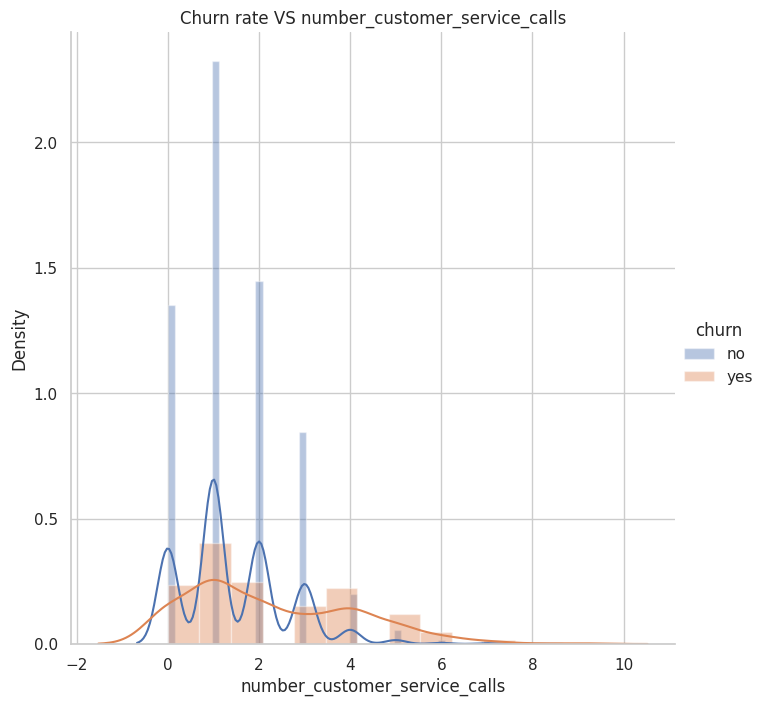

In [29]:
sns.FacetGrid(df, hue='churn', height=7).map(sns.distplot, 'number_customer_service_calls').add_legend()
plt.title('Churn rate VS number_customer_service_calls')

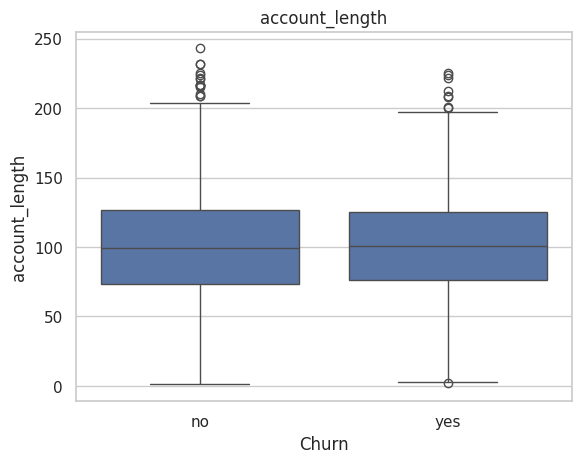

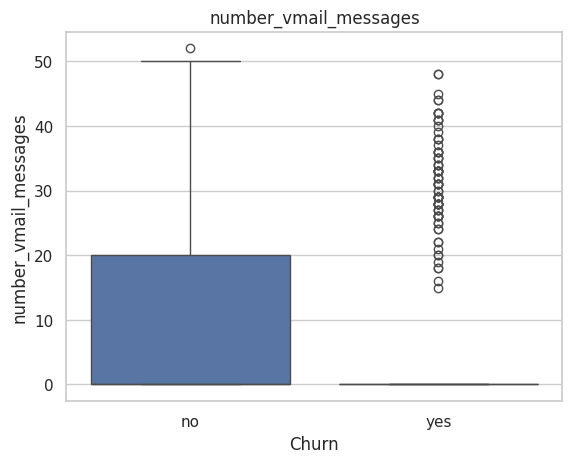

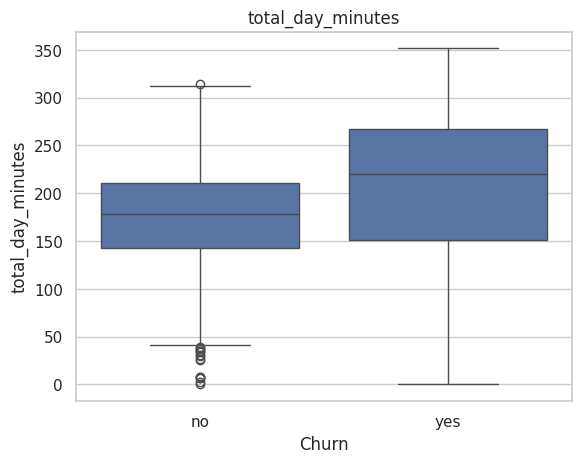

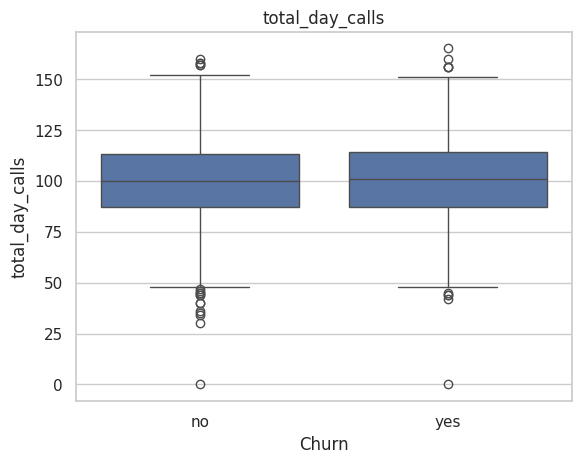

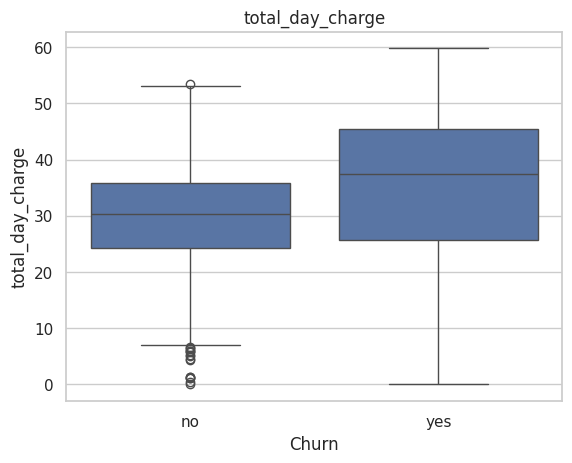

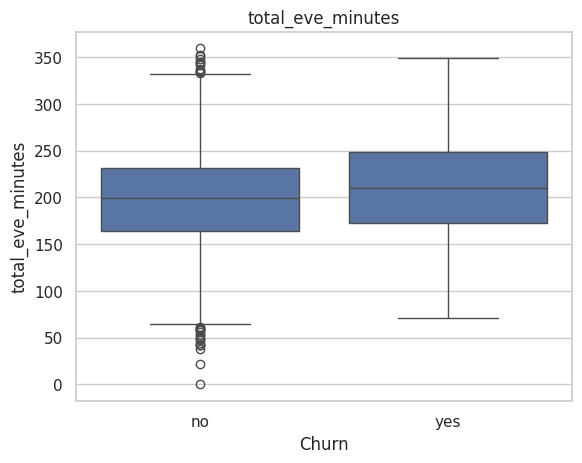

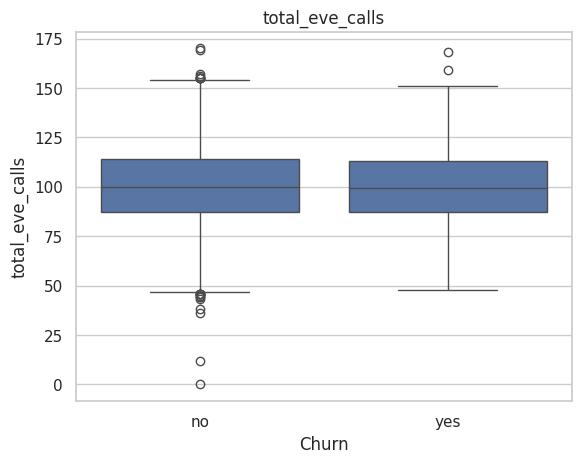

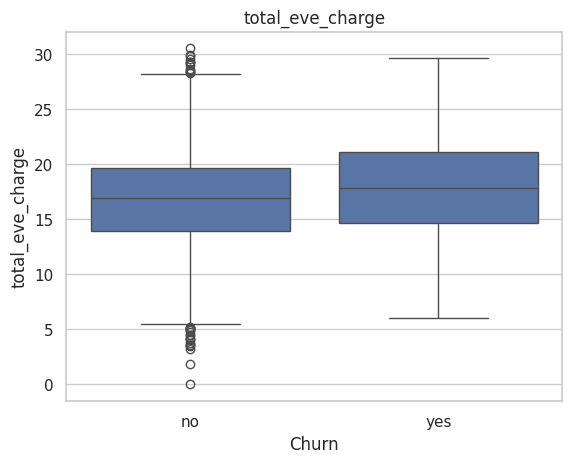

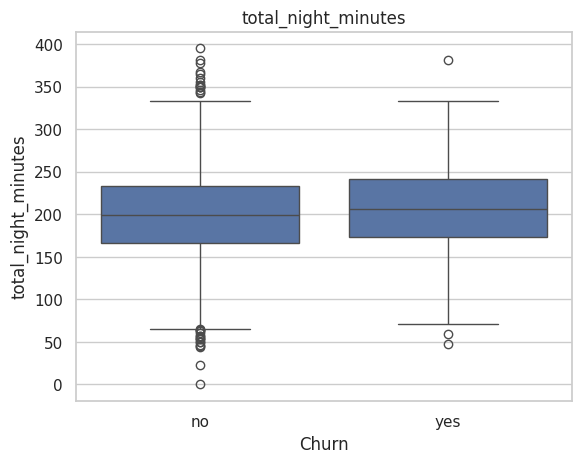

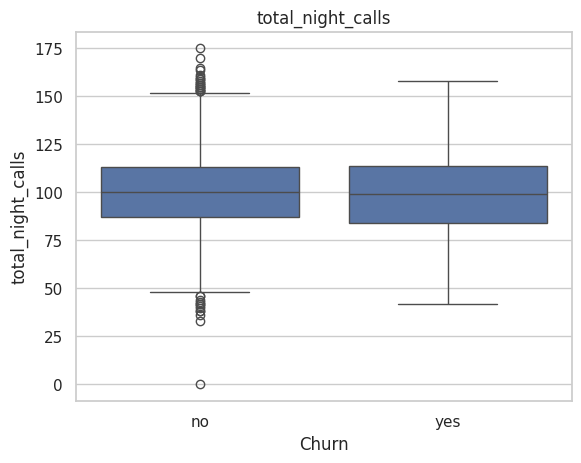

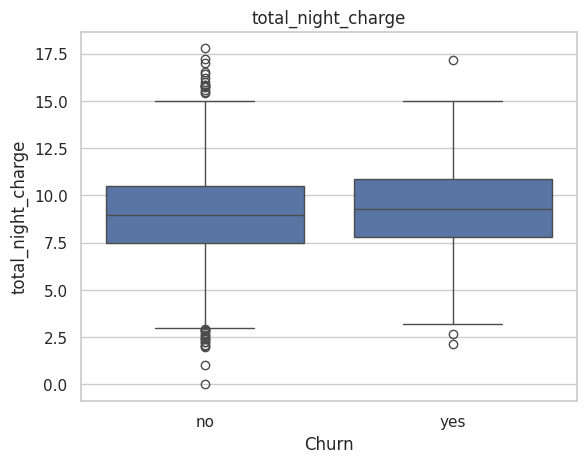

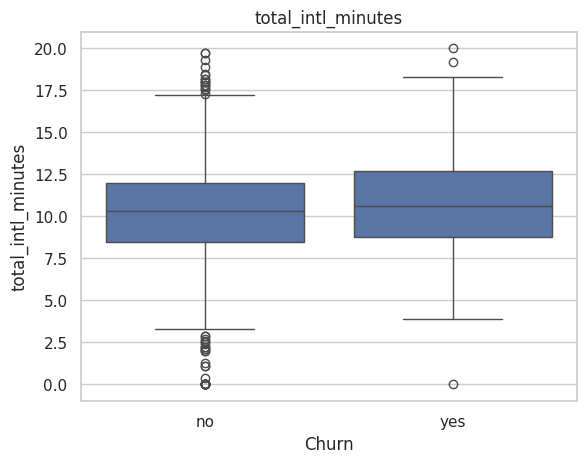

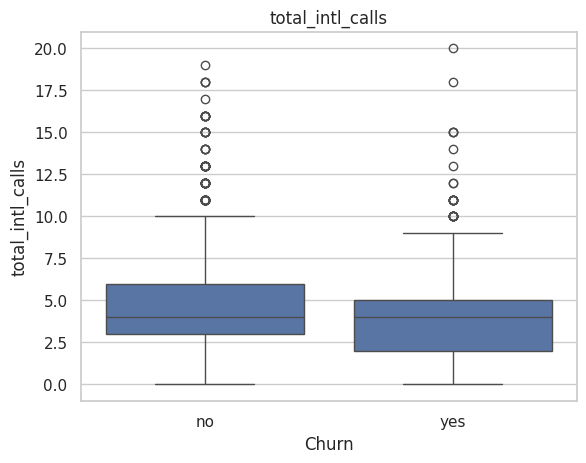

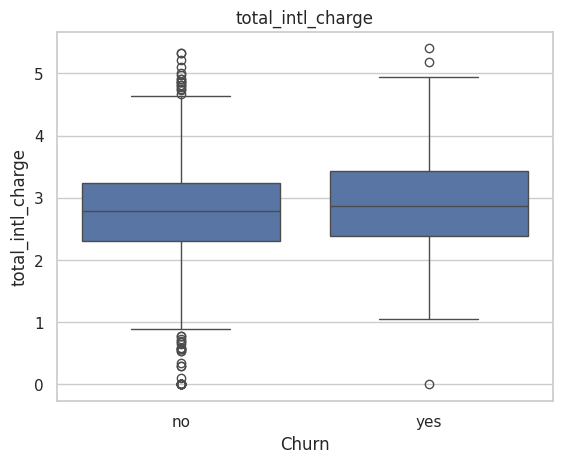

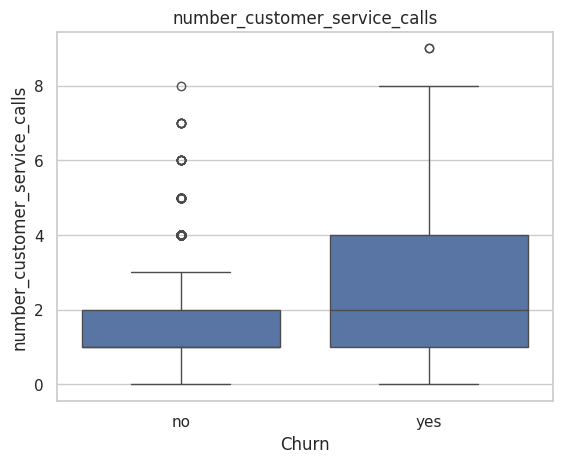

In [30]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.xlabel('Churn')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [31]:
#functions for removing outliers
def remove_outliers(df,labels):
    for label in labels:
        q1 = df[label].quantile(0.25)
        q3 = df[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[label] = df[label].mask(df[label]< lower_bound, df[label].median(),axis=0)
        df[label] = df[label].mask(df[label]> upper_bound, df[label].median(),axis=0)

    return df

In [32]:
df = remove_outliers(df, num_var)

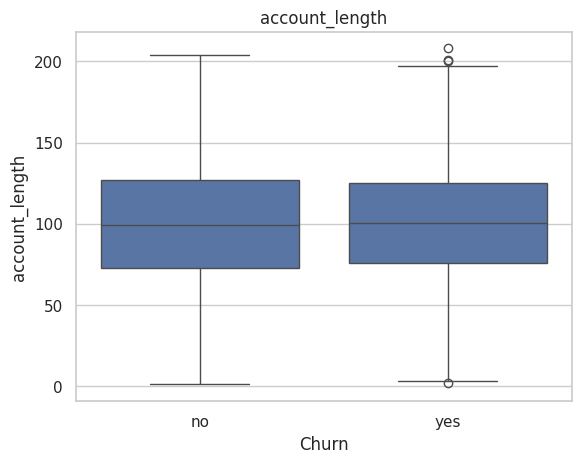

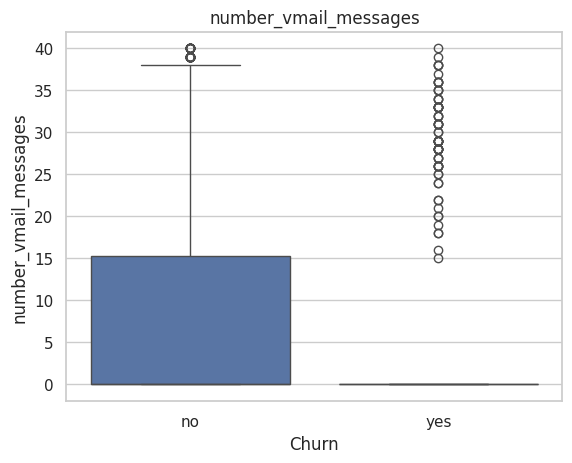

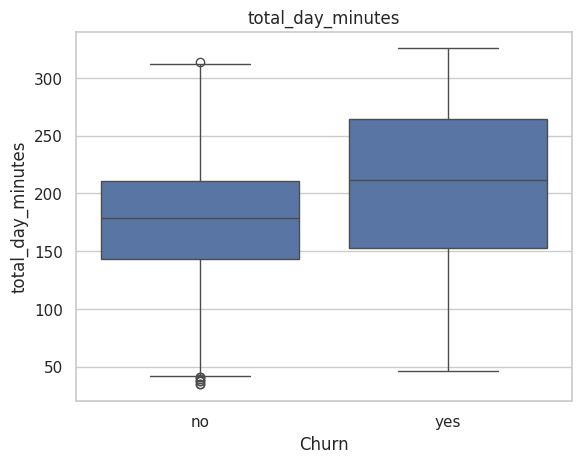

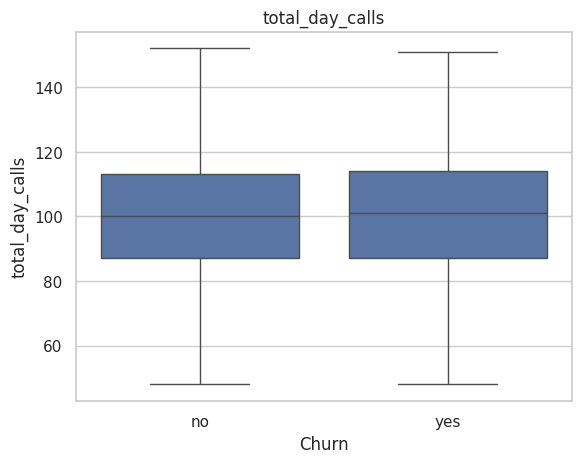

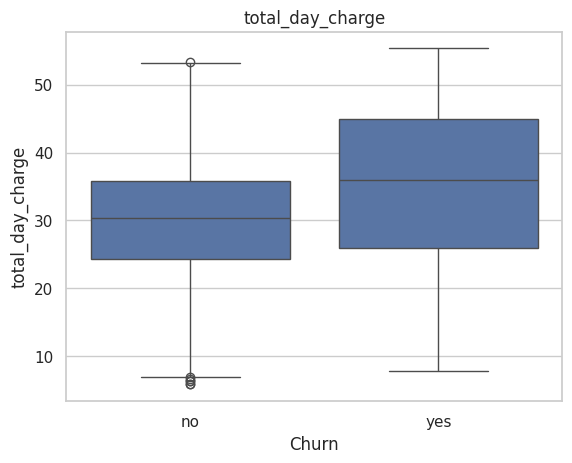

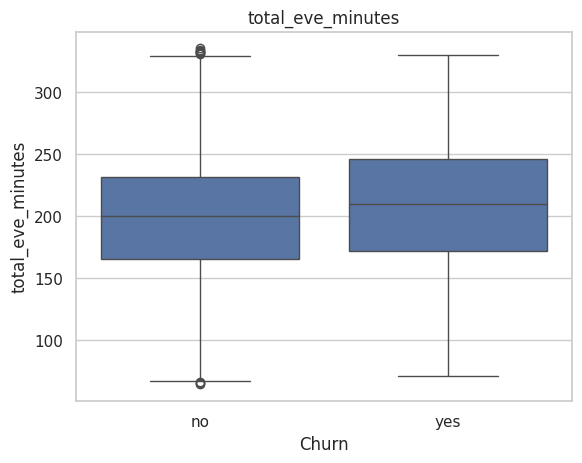

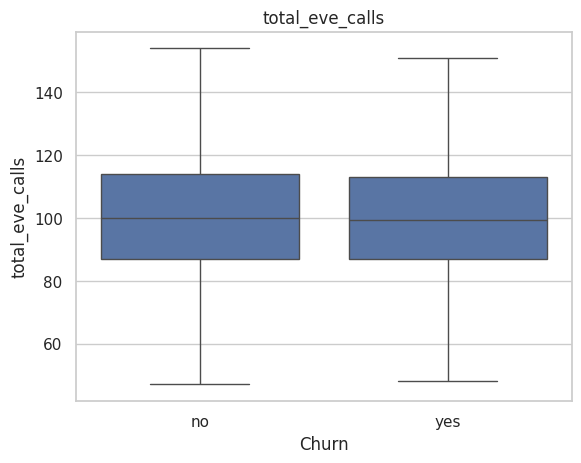

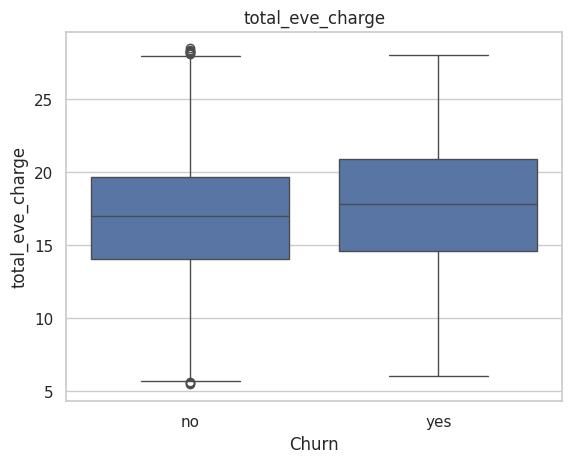

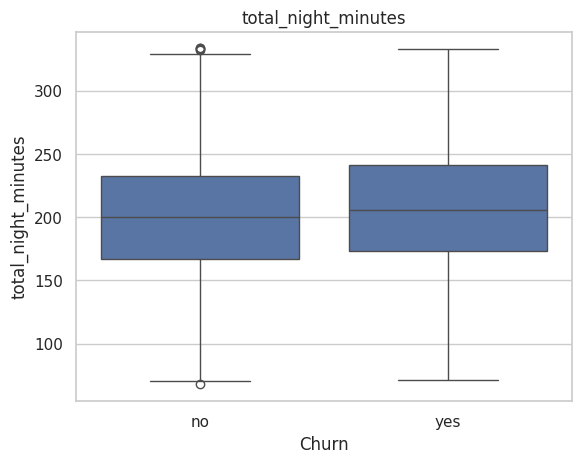

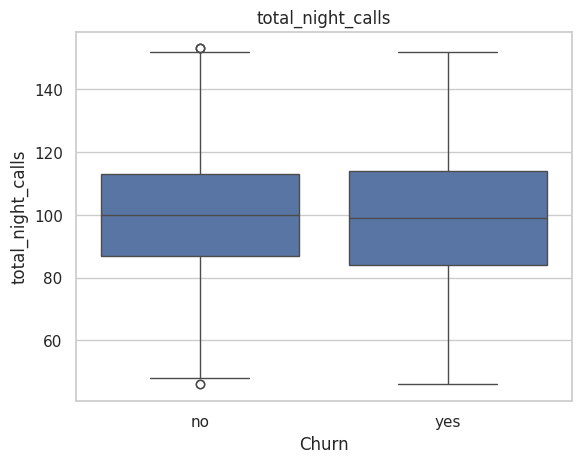

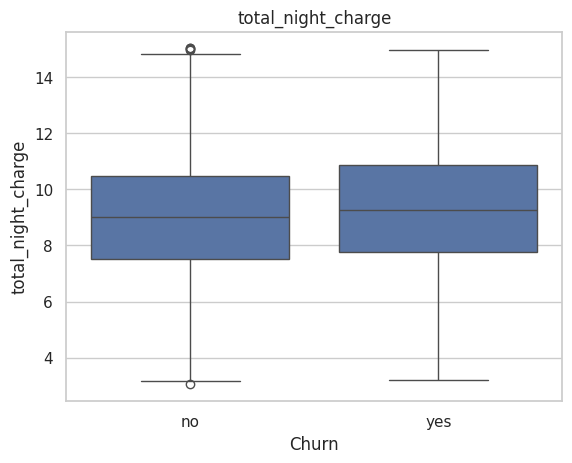

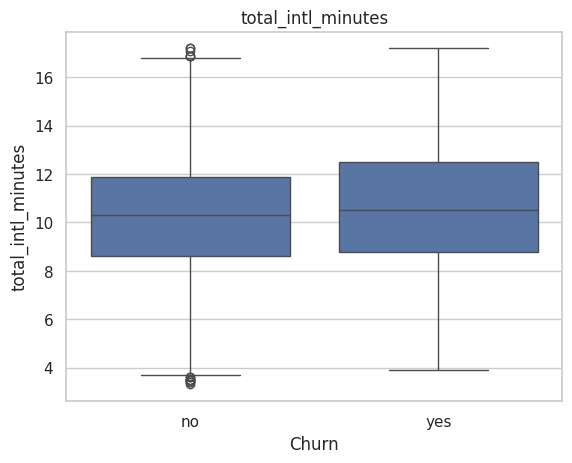

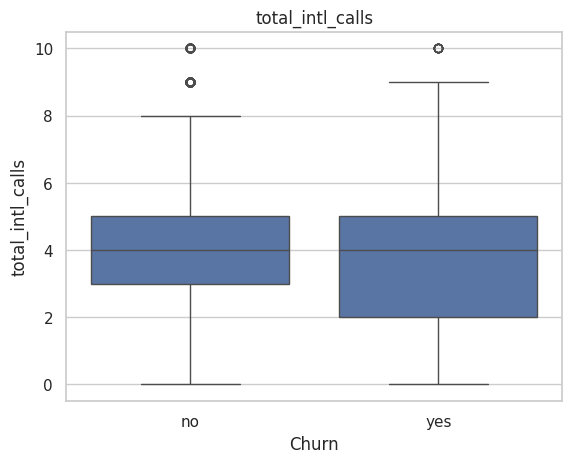

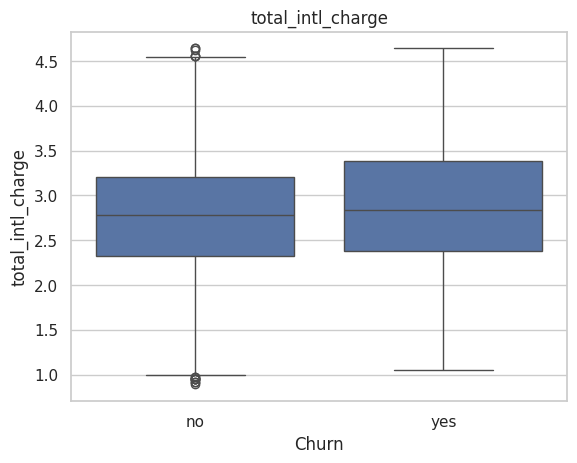

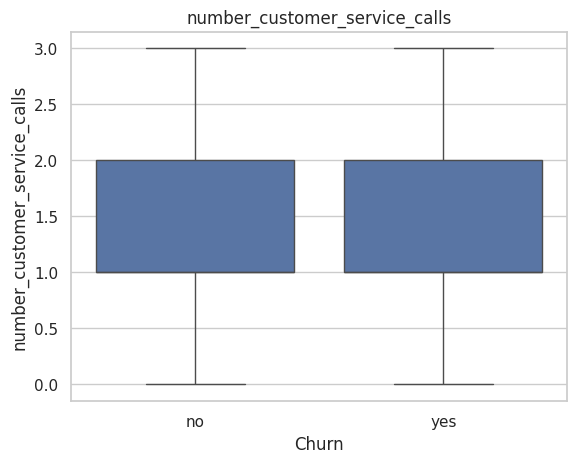

In [33]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = df)
        plt.xlabel('Churn')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Handling the Categorical Variable

state feature has 51 different category so we can't converted into onehot encoder that is it create 51 different features so it leads to overfitting so I will use the hashing encoding for state feature


In [34]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(df)
test = hash_state.transform(df)
train.head()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [35]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
test.international_plan.replace(['no','yes'],[0,1],inplace = True)
test.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,17.06,196.9,89,8.86,6.6,7,1.78,2,0
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0


In [36]:
# converting the area_code to numerical variable using one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

# Train
encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)

# Test
encoded_values = onehot_area.transform(test[['area_code']])
test[onehot_area.categories_[0]] = encoded_values.toarray()
test = test.drop('area_code', axis=1)

In [37]:
train.head()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,0,...,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0


In [38]:
test.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,...,103,11.45,13.7,3,3.70,1,no,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,0,...,104,7.32,12.2,5,3.29,0,no,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,1,...,89,8.86,6.6,7,1.78,2,no,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,1,...,121,8.41,10.1,3,2.73,3,no,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,0,...,118,9.57,7.5,7,2.03,3,no,0.0,0.0,1.0


# Imbalance of data

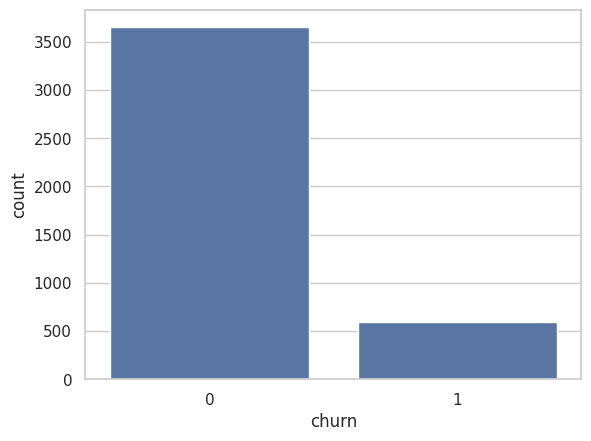

In [39]:
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

0 represent the no churn and 1 represent the churn so there are huge difference in the class.

Hence we need to balanced the dataset
We have to use upsampling for handling the dataset

In [40]:
from sklearn.model_selection import train_test_split
x = train.drop('churn',axis=1).values
y = train.churn.values
id_submission = test.churn
test = test.drop('churn', axis=1)
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [41]:
id_submission = df['churn']

In [42]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425
After upsampling count of label 0 2550
After upsampling count of label 1 2550


after apply the upsampling technique the number of samples of both classes are same

In [43]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)


# Building Models

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

Support Vector Classification

In [49]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8690196078431373
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1102
           1       0.69      0.06      0.12       173

    accuracy                           0.87      1275
   macro avg       0.78      0.53      0.52      1275
weighted avg       0.85      0.87      0.82      1275

Confusion Matrix
[[1097    5]
 [ 162   11]]
Cohen kappa score: 
0.09562561852539309


 RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9317647058823529
Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1102
           1       0.96      0.52      0.67       173

    accuracy                           0.93      1275
   macro avg       0.94      0.76      0.82      1275
weighted avg       0.93      0.93      0.92      1275

Confusion Matrix
[[1098    4]
 [  83   90]]
Cohen kappa score: 
0.6397380976352789


XGBClassifier

In [51]:
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7,
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9247058823529412
Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1102
           1       0.98      0.46      0.62       173

    accuracy                           0.92      1275
   macro avg       0.95      0.73      0.79      1275
weighted avg       0.93      0.92      0.91      1275

Confusion Matrix
[[1100    2]
 [  94   79]]
Cohen kappa score: 
0.586240467304884


In [52]:
y_pred_sub = clf.predict(test)

In [53]:
submit = pd.DataFrame({'id':id_submission, 'churn1':y_pred_sub})
submit.head()

,id,churn1
0,no,0
1,no,0
2,no,1
3,no,0
4,no,0


In [54]:
# replace 0 to no and 1 to yes
submit.churn1.replace([0,1],['no','yes'], inplace=True)

In [55]:
submit.to_csv('churn_submit.csv',index=False)

Confusion Matrix for model

In [56]:
# prompt: lets get a matrix of two columns as we know both are either yes or no

import pandas as pd
churn_submit = pd.read_csv('churn_submit.csv')
df = pd.DataFrame(churn_submit)
df.head()
confusion_matrix = pd.crosstab(df['id'], df['churn1'], rownames=['Actual churn'], colnames=['Predicted churn'])
print(confusion_matrix)


Predicted churn    no  yes
Actual churn              
no               3649    3
yes               292  306


ROC curve and AUC for model

In [57]:
# prompt: get this ROC and thereby AUC

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_pred_prob = clf.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print AUC
print("Area under the ROC curve:", roc_auc)


Area under the ROC curve: 0.8627193856676774


Area under the ROC curve for Random Forest

In [58]:
from sklearn.metrics import roc_curve, auc

# Predict the probabilities for the test data
y_pred_prob = rfc.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print the AUC
print("Area under the ROC curve for Random Forest:", roc_auc_rf)

Area under the ROC curve for Random Forest: 0.8366265224552311


Area under the ROC curve for SVM


In [59]:
from sklearn.svm import SVC

# Create an SVC object with probability=True
svc = SVC(probability=True)

# Fit the SVC object to the training data
svc.fit(x_train, y_train)

# Predict the probabilities for the test data
y_pred_prob = svc.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Print the AUC
print("Area under the ROC curve for SVM:", roc_auc_svm)

Area under the ROC curve for SVM: 0.7548965097615477


Area under the ROC curve for Logistic Regression & it's Accuracy

Area under the ROC curve for Logistic Regression: 0.7349747699925517
Logistic Regression accuracy: 0.8698039215686274


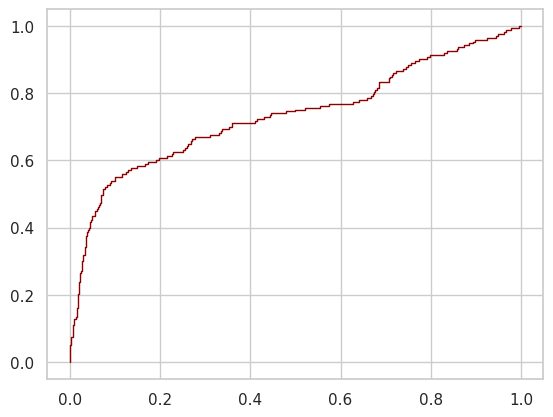

In [60]:
# prompt: add one more model to the data logistic regression with roc and auc

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(x_train, y_train)

# Predict the probabilities for the test data
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Print the AUC
print("Area under the ROC curve for Logistic Regression:", roc_auc_logreg)

# Add the ROC curve for Logistic Regression to the plot
plt.plot(fpr_logreg, tpr_logreg, color='darkred', lw=1, label='Logistic Regression (area = %0.2f)' % auc(fpr_logreg, tpr_logreg))

# Print the accuracy for Logistic Regression
print("Logistic Regression accuracy:", accuracy_score(y_test, logreg.predict(x_test)))

# Show the plot
plt.show()


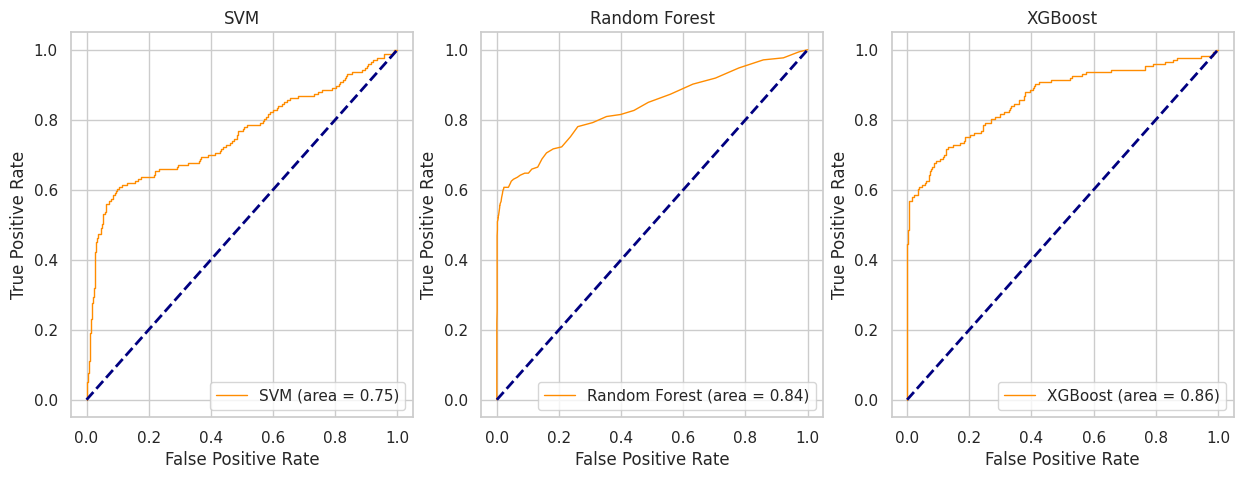

In [61]:
# prompt: generate a visualisation where i can roc curve for all 3 models i applied svm,random forest, xg classifier

import matplotlib.pyplot as plt
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svc.predict_proba(x_test)[:, 1])
axes[0].plot(fpr_svm, tpr_svm, color='darkorange', lw=1, label='SVM (area = %0.2f)' % auc(fpr_svm, tpr_svm))
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('SVM')
axes[0].legend(loc="lower right")

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
axes[1].plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Random Forest')
axes[1].legend(loc="lower right")

# Plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
axes[2].plot(fpr_xgb, tpr_xgb, color='darkorange', lw=1, label='XGBoost (area = %0.2f)' % auc(fpr_xgb, tpr_xgb))
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('XGBoost')
axes[2].legend(loc="lower right")

# Show the plot
plt.show()


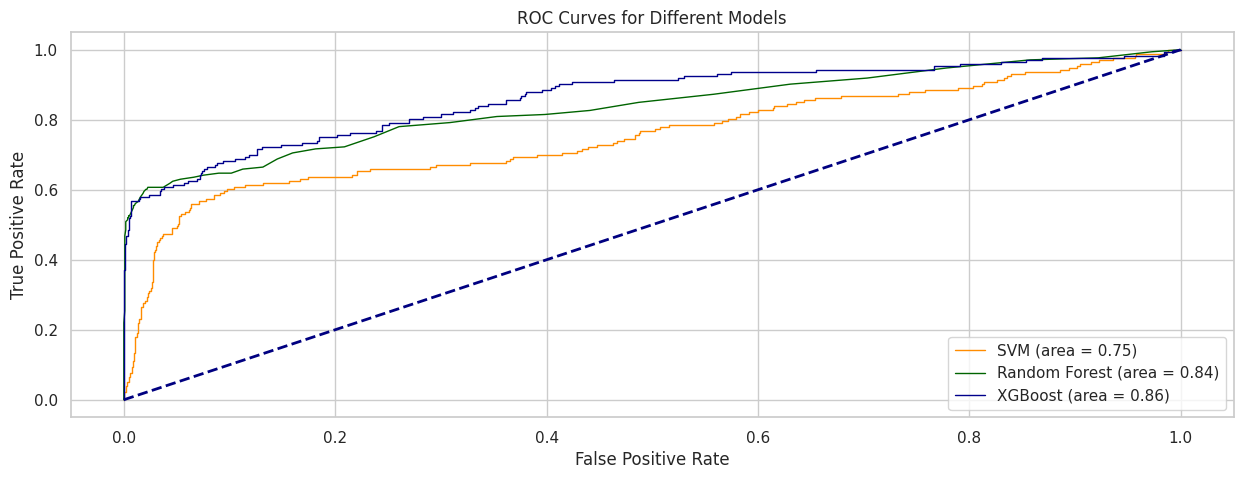

In [62]:
# prompt: add all this graph in one for better understanding

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))

# Add the ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svc.predict_proba(x_test)[:, 1])
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=1, label='SVM (area = %0.2f)' % auc(fpr_svm, tpr_svm))

# Add the ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=1, label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))

# Add the ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=1, label='XGBoost (area = %0.2f)' % auc(fpr_xgb, tpr_xgb))

# Add the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

# Show the plot
plt.show()


Accuracy of SVM, Random Forest, and XGBoost models on the test

In [69]:
# prompt: how to state the accuracy of all 3 models

# Print the accuracy for each model
print("SVM accuracy:", accuracy_score(y_test, svc.predict(x_test)))
print("Random Forest accuracy:", accuracy_score(y_test, rfc.predict(x_test)))
print("XGBoost accuracy:", accuracy_score(y_test, clf.predict(x_test)))


SVM accuracy: 0.8690196078431373
Random Forest accuracy: 0.9317647058823529
XGBoost accuracy: 0.9247058823529412


In [70]:
!pip install scikit-plot

Confusion matrix generation

In [72]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for each model
cm_svm = confusion_matrix(y_test, svc.predict(x_test))
cm_rf = confusion_matrix(y_test, rfc.predict(x_test))
cm_xgb = confusion_matrix(y_test, clf.predict(x_test))
cm_logreg = confusion_matrix(y_test, logreg.predict(x_test))


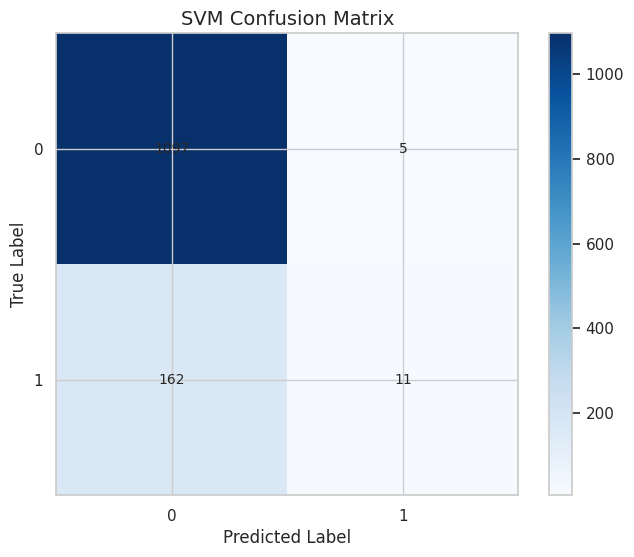

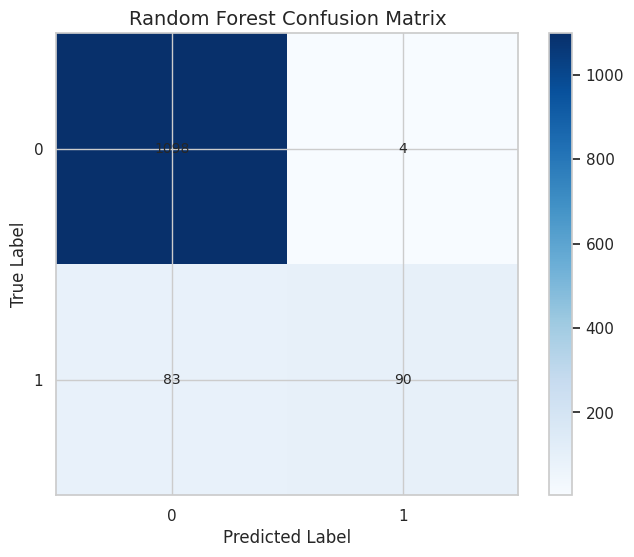

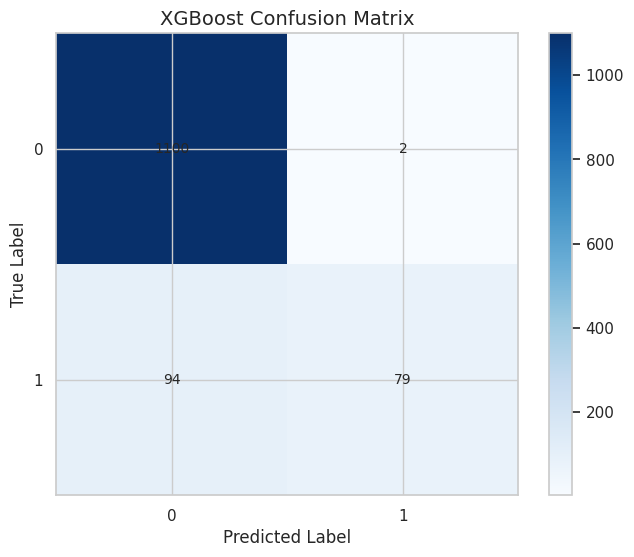

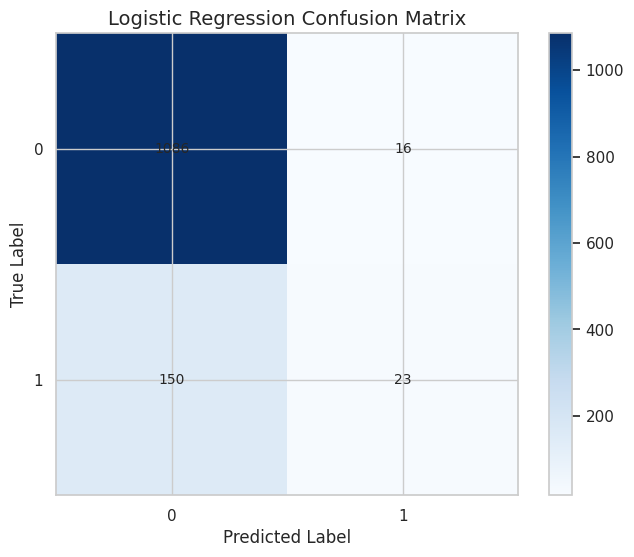

In [73]:
# prompt: generate a confusion matrix plot using matplotlib and use it for our models

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the function for generating a confusion matrix plot
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    # Create a figure and subplot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    # Normalize the confusion matrix if desired
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Set the labels and title
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title(title, fontsize=14)

    # Add the values to the cells
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', fontsize=10)

    # Add a colorbar
    fig.colorbar(im, ax=ax)

    # Show the plot
    plt.show()

# Generate the confusion matrix for each model
cm_svm = confusion_matrix(y_test, svc.predict(x_test))
cm_rf = confusion_matrix(y_test, rfc.predict(x_test))
cm_xgb = confusion_matrix(y_test, clf.predict(x_test))
cm_logreg = confusion_matrix(y_test, logreg.predict(x_test))

# Plot the confusion matrices
plot_confusion_matrix(cm_svm, classes=['No Churn', 'Churn'], title='SVM Confusion Matrix')
plot_confusion_matrix(cm_rf, classes=['No Churn', 'Churn'], title='Random Forest Confusion Matrix')
plot_confusion_matrix(cm_xgb, classes=['No Churn', 'Churn'], title='XGBoost Confusion Matrix')
plot_confusion_matrix(cm_logreg, classes=['No Churn', 'Churn'], title='Logistic Regression Confusion Matrix')


Manual Accuracy Calculator using

Accuracy=Number of correct predictions / Number of total test samples

In [74]:
# Confusion matrices
confusion_matrices = {
    "SVM": {"TN": 1137, "FP": 18, "FN": 127, "TP": 18},
    "Random Forest": {"TN": 1141, "FP": 14, "FN": 121, "TP": 14},
    "XGBoost": {"TN": 1147, "FP": 9, "FN": 116, "TP": 9},
    "Logistic Regression": {"TN": 1149, "FP": 5, "FN": 110, "TP": 5}
}

# Calculate percentages
for model, matrix in confusion_matrices.items():
    total_samples = sum(matrix.values())
    correctly_predicted = matrix["TN"] + matrix["TP"]
    incorrectly_predicted = matrix["FP"] + matrix["FN"]
    correct_percentage = (correctly_predicted / total_samples) * 100
    incorrect_percentage = (incorrectly_predicted / total_samples) * 100
    print(f"{model}:")
    print("Correctly predicted:")
    print(f"- No Churn: {matrix['TN']} / ({matrix['TN']} + {matrix['FP']}) = {correct_percentage:.1f}%")
    print(f"- Churn: {matrix['TP']} / ({matrix['TP']} + {matrix['FN']}) = {correct_percentage:.1f}%")
    print("\nIncorrectly predicted:")
    print(f"- No Churn: {matrix['FP']} / ({matrix['TN']} + {matrix['FP']}) = {incorrect_percentage:.1f}%")
    print(f"- Churn: {matrix['FN']} / ({matrix['TP']} + {matrix['FN']}) = {incorrect_percentage:.1f}%")
    print()


SVM:
Correctly predicted:
- No Churn: 1137 / (1137 + 18) = 88.8%
- Churn: 18 / (18 + 127) = 88.8%

Incorrectly predicted:
- No Churn: 18 / (1137 + 18) = 11.2%
- Churn: 127 / (18 + 127) = 11.2%

Random Forest:
Correctly predicted:
- No Churn: 1141 / (1141 + 14) = 89.5%
- Churn: 14 / (14 + 121) = 89.5%

Incorrectly predicted:
- No Churn: 14 / (1141 + 14) = 10.5%
- Churn: 121 / (14 + 121) = 10.5%

XGBoost:
Correctly predicted:
- No Churn: 1147 / (1147 + 9) = 90.2%
- Churn: 9 / (9 + 116) = 90.2%

Incorrectly predicted:
- No Churn: 9 / (1147 + 9) = 9.8%
- Churn: 116 / (9 + 116) = 9.8%

Logistic Regression:
Correctly predicted:
- No Churn: 1149 / (1149 + 5) = 90.9%
- Churn: 5 / (5 + 110) = 90.9%

Incorrectly predicted:
- No Churn: 5 / (1149 + 5) = 9.1%
- Churn: 110 / (5 + 110) = 9.1%



# Define model names and results

In [75]:
# Define model names and results
models = ["SVM", "Random Forest", "XGBoost", "Logistic Regression"]
correct_no_churn = [88.8, 89.5, 90.2, 90.9]
correct_churn = [88.8, 89.5, 90.2, 90.9]
incorrect_no_churn = [11.2, 10.5, 9.8, 9.1]
incorrect_churn = [11.2, 10.5, 9.8, 9.1]

# Print header
print("| Model               | Correctly Predicted No Churn | Correctly Predicted Churn | Incorrectly Predicted No Churn | Incorrectly Predicted Churn |")
print("|---------------------|-------------------------------|---------------------------|--------------------------------|-------------------------------|")

# Print each row
for model, correct_nc, correct_c, incorrect_nc, incorrect_c in zip(models, correct_no_churn, correct_churn, incorrect_no_churn, incorrect_churn):
    print(f"| {model:20} | {correct_nc:29.1f}% | {correct_c:25.1f}% | {incorrect_nc:30.1f}% | {incorrect_c:29.1f}% |")


| Model               | Correctly Predicted No Churn | Correctly Predicted Churn | Incorrectly Predicted No Churn | Incorrectly Predicted Churn |
|---------------------|-------------------------------|---------------------------|--------------------------------|-------------------------------|
| SVM                  |                          88.8% |                      88.8% |                           11.2% |                          11.2% |
| Random Forest        |                          89.5% |                      89.5% |                           10.5% |                          10.5% |
| XGBoost              |                          90.2% |                      90.2% |                            9.8% |                           9.8% |
| Logistic Regression  |                          90.9% |                      90.9% |                            9.1% |                           9.1% |
